In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn import metrics


In [135]:
df = pd.read_csv('/content/train.csv')
df_1 = pd.read_csv('/content/test.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [37]:
df_1.isna().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [122]:
df = df[df.columns[df.columns != 'Cabin']]
df = df[df.columns[df.columns != 'Embarked']]
df = df[df.columns[df.columns != 'Name']]
df = df[df.columns[df.columns != 'Ticket']]
df = df[df.columns[df.columns != 'PassengerId']]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df_1 = df_1[df_1.columns[df_1.columns != 'Cabin']]
df_1 = df_1[df_1.columns[df_1.columns != 'Embarked']]
df_1 = df_1[df_1.columns[df_1.columns != 'Name']]
df_1 = df_1[df_1.columns[df_1.columns != 'Ticket']]
df_1 = df_1[df_1.columns[df_1.columns != 'PassengerId']]
df_1['Sex'] = le.fit_transform(df_1['Sex'])


In [123]:
df.fillna(method='ffill', inplace=True)
df_1.fillna(method='ffill', inplace=True)


In [28]:
df = df.dropna()
df.reset_index(drop=True,inplace=True)

In [60]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,19.0,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [61]:
df_1

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,28.0,0,0,8.0500
414,1,0,39.0,0,0,108.9000
415,3,1,38.5,0,0,7.2500
416,3,1,38.5,0,0,8.0500


In [41]:
x = df[df.columns[df.columns != 'Survived']]

y = df.Survived
 
# Statsmodels.OLS requires us to add a constant.
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     95.42
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           2.12e-92
Time:                        09:18:07   Log-Likelihood:                -399.49
No. Observations:                 891   AIC:                             813.0
Df Residuals:                     884   BIC:                             846.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2567      0.066     18.937      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [124]:
x_train = df[df.columns[df.columns != 'Survived']]
y_train = df.Survived
x_test = df_1


In [65]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(x_train, y_train)
 
y_pred = clf.predict(x_test)
 
# # metrics are used to find accuracy or error
# from sklearn import metrics 
# print()
 
# # using metrics module for accuracy calculation
# print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


In [ ]:
y_pred

In [67]:
y_pred.shape

(418,)

In [55]:
df_1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [69]:
df_2

,Survived
0,0
1,0
2,0
3,1
4,0
...,...
413,0
414,1
415,0
416,0


In [136]:
df_2 = pd.DataFrame(y_pred_2, columns=['Survived'])
df_2['PassengerId'] = df_1['PassengerId']
df_2

,Survived,PassengerId
0,0,892
1,1,893
2,0,894
3,0,895
4,1,896
...,...,...
413,0,1305
414,1,1306
415,0,1307
416,0,1308


In [ ]:
x_train

In [137]:
df_2.to_csv('ans2.csv')

In [76]:
from tensorflow import keras
from keras import layers


In [125]:
model = keras.Sequential([
	keras.layers.Dense(64, input_shape=(6,),activation='relu'),
	keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
	keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam',
			loss=keras.losses.BinaryCrossentropy(),
			metrics=['accuracy'])


In [129]:
history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
28/28 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7890
Epoch 2/50
28/28 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.7868
Epoch 3/50
28/28 [==============================] - 0s 2ms/step - loss: 0.4864 - accuracy: 0.7834
Epoch 4/50
28/28 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.7924
Epoch 5/50
28/28 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.7901
Epoch 6/50
28/28 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.8025
Epoch 7/50
28/28 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7957
Epoch 8/50
28/28 [==============================] - 0s 3ms/step - loss: 0.4804 - accuracy: 0.8013
Epoch 9/50
28/28 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.7778
Epoch 10/50
28/28 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7980
Epoch 11/50
28/28 [

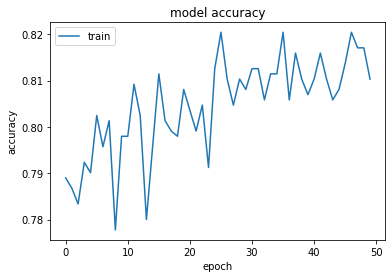

In [130]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

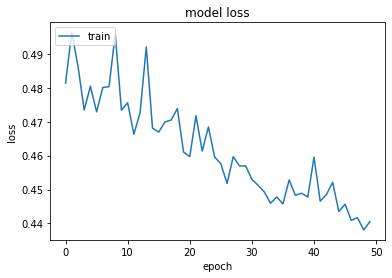

In [131]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [132]:
y_pred_2 = model.predict(x_test)

14/14 [==============================] - 0s 2ms/step


In [133]:
y_pred_2 = [round(i[0]) for i in y_pred_2]

1

In [ ]:
y_pred_2